In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part One - Extracting Data With Pandas

As we discussed last week, the 'Read HTML' function in Pandas is an easy way to pull down tables from web pages. We'll be using Wikipedia for a lot of examples in class.

Today we'll be looking at the Wikipedia page the median age of every country in the world.

If you need to know more about a function in Python, you can type in a function with a question mark next to it to pull up its documentation (you can also Google the function). The question mark below will pull up the same info you can see at https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [4]:
pd.read_html?

The Read HTML function only has one required argument, which is the URL of the page you want to scrape. It will return a **list of dataframes** from that page - essentially it will translate anything on a page that's structured as a table and return it as a **dataframe** to work with.

Below we'll see that there are two dataframes in this list as per the len function, which gives us the length of a variable.

In [5]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')
print(len(tables))

2


In [6]:
tables[0]

,0,1,2,3,4
0,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
1,Afghanistan,208,18.8,18.8,18.9
2,Albania,95,32.9,31.6,34.3
3,Algeria,136,28.1,27.8,28.4
4,American Samoa,122,25.5,25.1,26.0
5,Andorra,10,44.3,44.4,44.1
6,Angola,214,15.9,15.4,16.3
7,Anguilla,79,34.8,32.9,36.7
8,Antigua and Barbuda,102,31.9,30.0,33.5
9,Argentina,105,31.7,30.5,32.9


If we add a '0' in brackets after the function, we'll get the first dataframe in the list. (the head function after gives us the first five rows of the dataframe)

Note that Python uses **0-based indexing** meaning that if you want to access the first item in a list, you reference it with **0** rather than **1**.

In [7]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')[0].head()

,0,1,2,3,4
0,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
1,Afghanistan,208,18.8,18.8,18.9
2,Albania,95,32.9,31.6,34.3
3,Algeria,136,28.1,27.8,28.4
4,American Samoa,122,25.5,25.1,26.0


We can turn the first row into column headers by adding the 'header' argument with the number of the row we want to use as the header.

In [8]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0].head()

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
0,Afghanistan,208,18.8,18.8,18.9
1,Albania,95,32.9,31.6,34.3
2,Algeria,136,28.1,27.8,28.4
3,American Samoa,122,25.5,25.1,26.0
4,Andorra,10,44.3,44.4,44.1


Now we can turn this into a local dataframe and work with it!

In [9]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]

### Extreme Crash Course in Dataframes

In [10]:
#Get the dimensions of a DataFrame
df.shape

(230, 5)

In [11]:
#Get the columns in a DataFrame
df.columns

Index(['Country/Territory', 'Rank', 'Total(Year)', 'Male(Year)',
       'Female (Year)'],
      dtype='object')

In [12]:
#Get the datatype of each column in a Dataframe
df.dtypes

Country/Territory     object
Rank                   int64
Total(Year)          float64
Male(Year)           float64
Female (Year)        float64
dtype: object

In [13]:
#Extract a column in a Dataframe as a Series
df['Country/Territory'].head()

0       Afghanistan
1           Albania
2           Algeria
3    American Samoa
4           Andorra
Name: Country/Territory, dtype: object

In [14]:
#Extract multiple columns in a Dataframe as a new Dataframe
df[['Country/Territory', 'Rank']].head()

,Country/Territory,Rank
0,Afghanistan,208
1,Albania,95
2,Algeria,136
3,American Samoa,122
4,Andorra,10


## Part Two - Data Visualization

Now that we've seen our way around Pandas, we can look at some actual data using the techniques and metrics we saw in the lecture.

The 'Total(Year)' column in our dataframe is the median age for every country in the world. Let's see what the distribution is like and find out more about it.

First, let's plot a histogram to see the distribution using Seaborn and Matplotlib. Matplotlib is a core Python visualization library while Seaborn is a package built on top of it. You could go a mile deep into what these two packages are capable of, as you'll see in the readings this week. We want to keep it simple without it getting overwhelming for now. We'll learn the new tools as we need them.

(array([28., 27., 29., 33., 28., 24., 25., 32.,  3.,  1.]),
 array([15.4 , 19.17, 22.94, 26.71, 30.48, 34.25, 38.02, 41.79, 45.56,
        49.33, 53.1 ]),
 <a list of 10 Patch objects>)

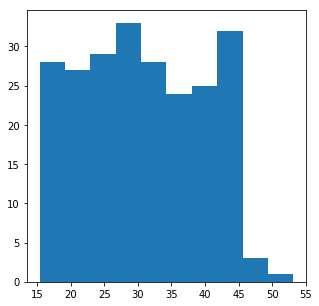

In [15]:
#Plot a Histogram - The Fig Line is to Make the Graph Bigger
fig = plt.figure(figsize=(5,5))
plt.hist(df['Total(Year)'])

Looks like the median ages of countries are pretty evenly dispersed between ages 15 and 45, with a few countries that might have a higher age.

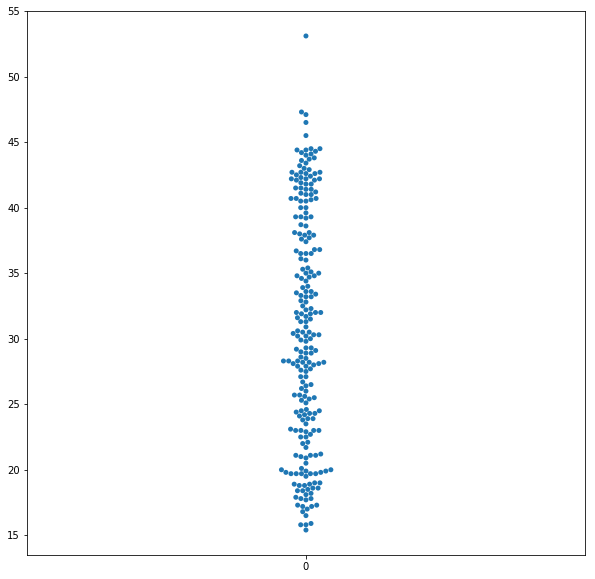

In [16]:
#Plot a Swarmplot
fig = plt.figure(figsize=(10,10))
sns.swarmplot(data=df['Total(Year)'])

The swarmplot shows us that there's a country with an age between 50 and 55 that really sticks out.

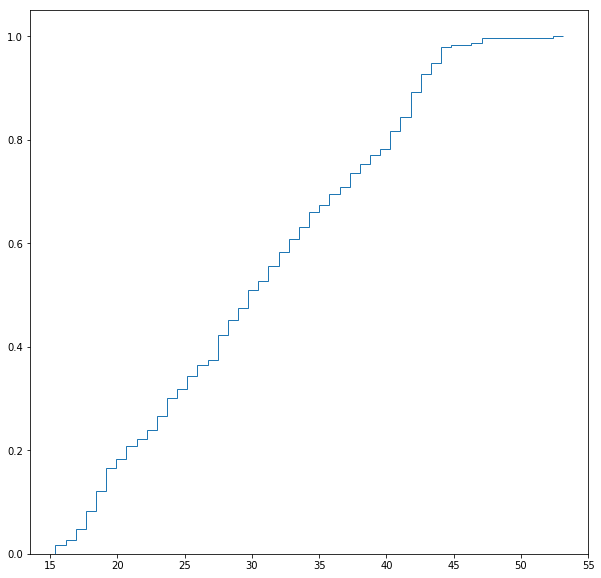

In [17]:
#Plot an ECDF
fig = plt.figure(figsize=(10,10))
n,bins,patches = plt.hist(df['Total(Year)'], cumulative=True, bins=50, density=True, histtype='step');
#This extra line removes the final line from the graph
patches[0].set_xy(patches[0].get_xy()[:-1])

 The ECDF also confirms that the distribution is relatively uniform up through age 45.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25e6ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25fcd7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25e6acc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25fcde80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25fcdf60>],
 'means': []}

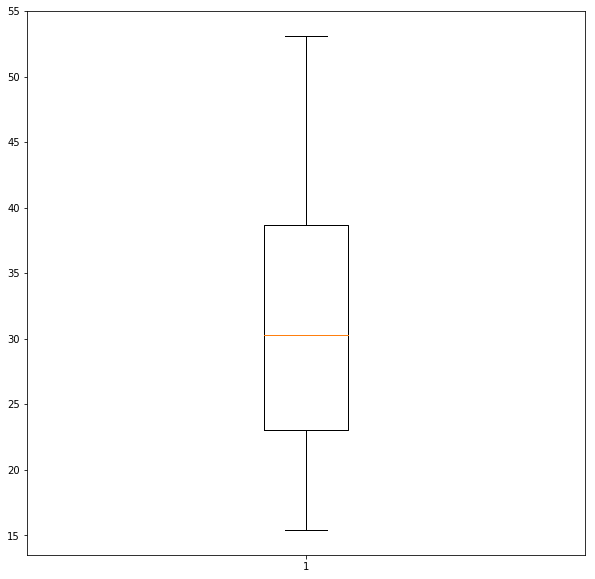

In [18]:
#Plot a Boxplot
fig = plt.figure(figsize=(10,10))
plt.boxplot(df['Total(Year)'])

The boxplot shows that the country with the median age of 55 isn't officially considered an outlier.

Hopefully you can see how using multiple visualizations can give you a more complete understanding of your distribution!

## Part Three - Summary Statistics

First, let's get the mean and median values of our dataset.

In [19]:
#Mean
np.mean(df['Total(Year)'])

30.738695652173924

In [20]:
#Median
np.median(df['Total(Year)'])

30.3

The mean and the median being close make sense, since the data is fairly evenly distributed (had the data been highly skewed, the mean and the median would be further apart).

Now let's look at the variance and standard deviation.

In [21]:
#Variance
np.var(df['Total(Year)'])

78.67019829867668

In [22]:
#Standard Deviation
np.std(df['Total(Year)'])

8.869622218486912

These numbers don't really provide much information by themselves.

In [23]:
np.sqrt(np.var(df['Total(Year)']))

8.869622218486912

Here we can see that the square root of the variance is indeed the standard deviation.

In [24]:
total_variance = 0
for i in df['Total(Year)']:
    x = np.power(i - df['Total(Year)'].mean(), 2)
    total_variance += x
print(total_variance/len(df['Total(Year)']))

78.67019829867668


For those curious, above is the variance executed by 'hand'

In [25]:
#Maximum
np.max(df['Total(Year)'])

53.1

In [26]:
#Minimum
np.min(df['Total(Year)'])

15.4

In [27]:
#Range
np.max(df['Total(Year)']) - np.min(df['Total(Year)'])

37.7

Above is the maximum, minimum, and range.

In [28]:
#First Quartile
np.percentile(df['Total(Year)'], q=25)

23.0

In [29]:
#Second Quartile
np.percentile(df['Total(Year)'], q=50)

30.3

In [30]:
#Third Quartile
np.percentile(df['Total(Year)'], q=75)

38.675000000000004

In [31]:
#Interquartile Range
np.percentile(df['Total(Year)'], q=75) - np.percentile(df['Total(Year)'], q=25)

15.675000000000004

Above are the first, second, and third quartiles. A few things here:

* Note that the value of the second quartile is equivalent to the median which we found earlier.
* Note that the difference between the first quartile and second quartile and the difference between the second quratile and third quartile are pretty close to each other, confirming that the data is pretty evenly distributed between these quartiles. The difference between the minimum value and the first quartile is also pretty close these values, however the diference between the third quartile and the maximum value is slightly larger than these, confirming our visual understanding that this distribution is fairly uniform besides a few high outliers.

Note that below it the unofficial equation for what constitutes a cutoff - anything above this value is technically an outlier.

In [32]:
np.percentile(df['Total(Year)'], q=75) + (np.percentile(df['Total(Year)'], q=75) - np.percentile(df['Total(Year)'], q=25)) * 1.5

62.187500000000014

And anything below this value is techincally an outlier. Obviously someone's age can't be negative, so this measure isn't perfect in this case.

In [33]:
np.percentile(df['Total(Year)'], q=25) - (np.percentile(df['Total(Year)'], q=75) - np.percentile(df['Total(Year)'], q=25)) * 1.5

-0.5125000000000064

## Part Four - Pandas Wrangling

Now we can do some brief Pandas wrangling to find out a few things. First we can see which country had the highest median age.

In [34]:
df[df['Total(Year)'] == np.max(df['Total(Year)'])]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
137,Monaco,1,53.1,51.7,54.5


As well as which country had the lowest.

In [35]:
df[df['Total(Year)'] == np.min(df['Total(Year)'])]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
151,Niger,230,15.4,15.3,15.5


We can also input different numbers by value - for example below we'll see which countries had a median age above 45. Try messing around with this!

In [36]:
df[df['Total(Year)'] >= 45]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year)
77,Germany,3,47.1,46.0,48.2
101,Italy,5,45.5,44.4,46.5
103,Japan,2,47.3,46.0,48.7
137,Monaco,1,53.1,51.7,54.5
174,Saint Pierre and Miquelon,4,46.5,46.0,47.0


## Part Five - Grouped Data

Now we'll import the associated continents for each country to look at this data by continent. We'll use the 'Read CSV' function, which reads in a CSV file.

In [37]:
continents = pd.read_csv('continents.csv')
continents.head()

,Country(or dependent territory),Continent
0,Nigeria,Africa
1,Ethiopia,Africa
2,Egypt,Africa
3,Democratic Republic of the Congo,Africa
4,South Africa,Africa


We can add this information using the merge function (this isn't vital to know right now).

In [38]:
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df.head()

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year),Country(or dependent territory),Continent
0,Afghanistan,208,18.8,18.8,18.9,Afghanistan,Asia
1,Albania,95,32.9,31.6,34.3,Albania,Europe
2,Algeria,136,28.1,27.8,28.4,Algeria,Africa
3,American Samoa,122,25.5,25.1,26.0,American Samoa,Oceania
4,Andorra,10,44.3,44.4,44.1,Andorra,Europe


This dataframe is a bit messy. Let's just keep the essential columns.

In [39]:
new_df = new_df[['Country/Territory', 'Total(Year)', 'Continent']]
new_df.head()

,Country/Territory,Total(Year),Continent
0,Afghanistan,18.8,Asia
1,Albania,32.9,Europe
2,Algeria,28.1,Africa
3,American Samoa,25.5,Oceania
4,Andorra,44.3,Europe


We can see how many countries are in each continent by using the 'value counts' function.

In [40]:
new_df['Continent'].value_counts()

Europe           55
Africa           50
Asia             49
North America    33
Oceania          21
South America    12
Name: Continent, dtype: int64

We can also use the "normalize" argument to see the percentage of total countries in each continent.

In [41]:
new_df['Continent'].value_counts(normalize=True)

Europe           0.250000
Africa           0.227273
Asia             0.222727
North America    0.150000
Oceania          0.095455
South America    0.054545
Name: Continent, dtype: float64

We can single out a single continent by using the code below.

In [42]:
new_df[new_df['Continent'] == 'Asia'].head()

,Country/Territory,Total(Year),Continent
0,Afghanistan,18.8,Asia
9,Armenia,35.1,Asia
13,Azerbaijan,31.3,Asia
15,Bahrain,32.3,Asia
16,Bangladesh,26.7,Asia


We can do a **groupby** function to get the average age, variance, and standard deviation for each continent.

In [43]:
new_df.groupby('Continent')['Total(Year)'].mean()

Continent
Africa           20.728000
Asia             30.077551
Europe           40.527273
North America    33.327273
Oceania          28.538095
South America    29.633333
Name: Total(Year), dtype: float64

In [44]:
new_df.groupby('Continent')['Total(Year)'].std()

Continent
Africa           4.739717
Asia             6.530705
Europe           4.352541
North America    6.492316
Oceania          5.376567
South America    3.191276
Name: Total(Year), dtype: float64

In [45]:
new_df.groupby('Continent')['Total(Year)'].var()

Continent
Africa           22.464914
Asia             42.650111
Europe           18.944613
North America    42.150170
Oceania          28.907476
South America    10.184242
Name: Total(Year), dtype: float64

This won't apply so much in this dataset, but you can group by multiple variables, too.

In [46]:
new_df.groupby(['Continent', 'Country/Territory'])['Total(Year)'].mean().head()

Continent  Country/Territory
Africa     Algeria              28.1
           Angola               15.9
           Benin                18.2
           Botswana             24.5
           Burkina Faso         17.3
Name: Total(Year), dtype: float64

Or you can see the value counts for a given continent.

In [47]:
new_df[new_df['Continent'] == 'Africa']['Country/Territory'].value_counts().head()

Algeria                  1
Gabon                    1
Uganda                   1
Republic of the Congo    1
Ghana                    1
Name: Country/Territory, dtype: int64

We can lay the histograms for each of the continents on top of each other using a for loop.

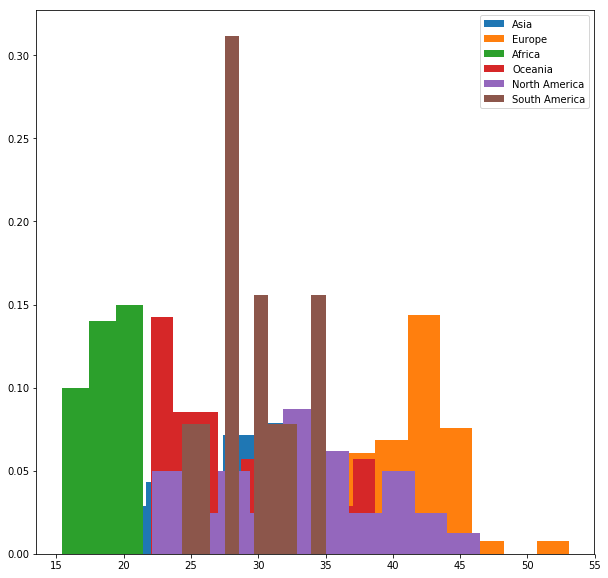

In [48]:
fig = plt.figure(figsize=(10,10))
for continent in new_df['Continent'].unique():
    plt.hist(new_df[new_df['Continent'] == continent]['Total(Year)'], density=True)
plt.gca().legend(new_df['Continent'].unique())

Unfortunately this looks extremely cluttered and isn't really helpful in our analysis. Histograms aren't great for this. Let's try a bee swarm, box plot and ECDF plot. Look below - what information can we gather from these?

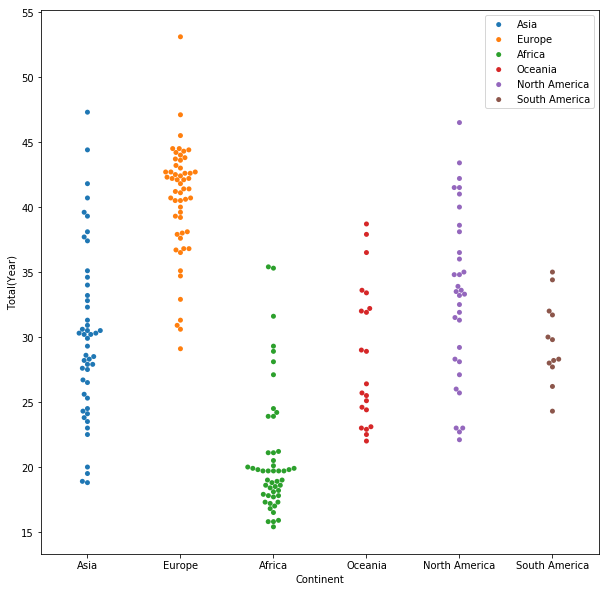

In [49]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='Total(Year)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

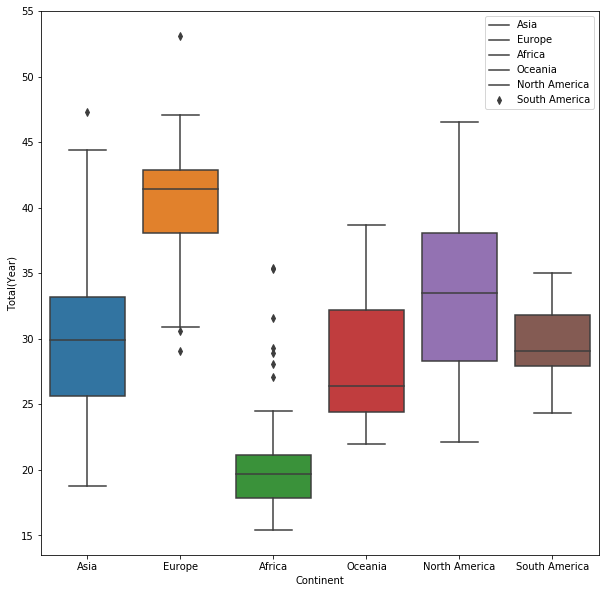

In [50]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Total(Year)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

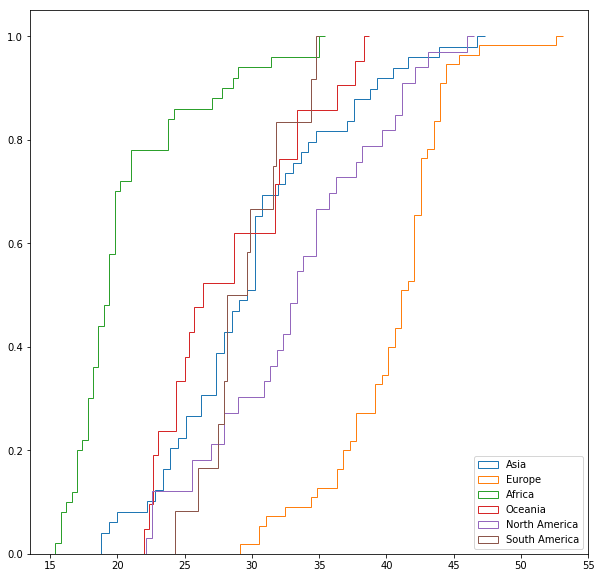

In [51]:
#Plot an ECDF
fig = plt.figure(figsize=(10,10))
for continent in new_df['Continent'].unique():
    n,bins,patches = plt.hist(new_df[new_df['Continent'] == continent]['Total(Year)'], cumulative=True, bins=50, density=True, histtype='step');
    patches[0].set_xy(patches[0].get_xy()[:-1])
plt.gca().legend(new_df['Continent'].unique(), loc='lower right')

## Part Six - Your Turn

Now it's your turn! The dataframe below has the logarithmic value of the GDP for every country in the world (we're taking the log because the regular GDP is essentially ungraphable - try it yourself and see what happens). Let's explore and see what we can find!

In [52]:
l = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)', header=0)
world_gdp = l[1].iloc[3:194,1:3].reset_index(drop=True)
world_gdp.columns = ['Country', 'GDP']
world_gdp['Country'] = world_gdp['Country'].str.split('[').str[0]
world_gdp['GDP'] = world_gdp['GDP'].str.split('/').str[0].str.replace(',','')
world_gdp['GDP'] = world_gdp['GDP'].astype('float')
world_gdp['GDP_Log'] = np.log(world_gdp['GDP'])
world_gdp.head(5)

,Country,GDP,GDP_Log
0,United States,20513000.0,16.836569
1,China,13457267.0,16.415030
2,Japan,5070626.0,15.438975
3,Germany,4029140.0,15.209064
4,United Kingdom,2808899.0,14.848303


##### 1. Plot the histogram, swarmplot, boxplot, and ECDF of the GDP Log. How does this histogram differ from the histogram we saw of the median age above? How does the ECDF differ from the ECDF we saw of the median age? What else can we tell about the distribution from these plots? Are there any outliers?

Histogram:

(array([ 1.,  7., 16., 22., 44., 40., 31., 18., 10.,  2.]),
 array([ 3.80666249,  5.10965318,  6.41264387,  7.71563456,  9.01862525,
        10.32161594, 11.62460663, 12.92759732, 14.23058801, 15.5335787 ,
        16.83656939]),
 <a list of 10 Patch objects>)

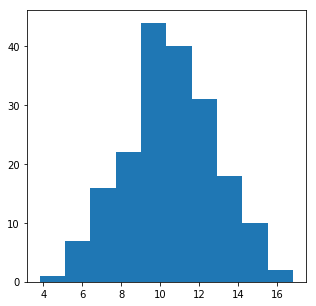

In [53]:
gdphist = plt.figure(figsize=(5,5))
plt.hist(world_gdp['GDP_Log'])

Swarmplot:

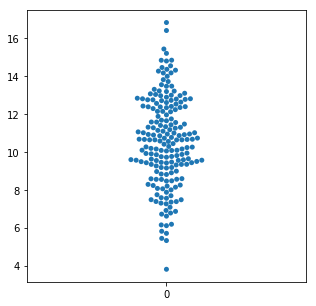

In [54]:
swarmplotgdp = plt.figure(figsize=(5,5))
sns.swarmplot(data=world_gdp['GDP_Log'])

Boxplot:

{'whiskers': [<matplotlib.lines.Line2D at 0x1a28cdb518>,
 'caps': [<matplotlib.lines.Line2D at 0x1a28cdbba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a28cdb0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a28cdbfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a28ce35c0>],
 'means': []}

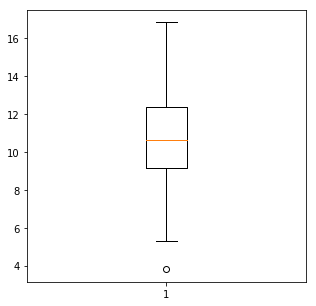

In [55]:
boxplotgdp = plt.figure(figsize=(5,5))
plt.boxplot(world_gdp['GDP_Log'])

ECDF:

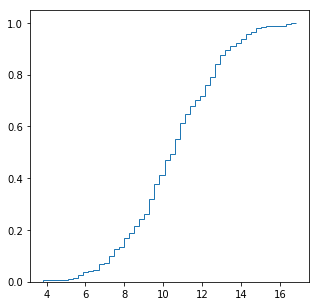

In [56]:
fig = plt.figure(figsize=(5,5))
n,bins,patches = plt.hist(world_gdp['GDP_Log'], cumulative=True, bins=50, density=True, histtype='step');
#This extra line removes the final line from the graph
patches[0].set_xy(patches[0].get_xy()[:-1])

How does this histogram differ from the histogram we saw of the median age above? 
This histogram dealing with GDP_Log is more clear at visualizing the data when it comes to the mean, mode, and range, compared to that of the median histogram which looks more compressed and makes it harder to derive key information from the dataset.
______________

 How does the ECDF differ from the ECDF we saw of the median age?
 The ECDF of the median looks to have a more linear growth, compared to that of the GDP_Log that has more of a parabolic shape. Also in the GDP_Log you can see there is less outliers compared to that of the median age.
 ________________

What else can we tell about the distribution from these plots?
From these plots we can gather some useful information such as mean, mode, range, median, outliers, and even the skewness of the data. It gives a good visualization of the data.
____

Are there any outliers?
Yes there are, the best representation in my opinion is shown in the swarmplots, we see dots that are seemly distant to the others. Outliers in the GDP would be like the United States and China.
_______

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of the GDP Log.

In [91]:
#MEAN
np.mean(world_gdp['GDP_Log'])

10.566274390714232

In [92]:
#MEDIAN
np.median(world_gdp['GDP_Log'])

10.64144078072663

In [93]:
#VARIANCE
np.var(world_gdp['GDP_Log'])

5.460071918544747

In [94]:
#STANDARD DEVIATION
np.std(world_gdp['GDP_Log'])

2.336679678206824

In [95]:
#MIN
np.min(world_gdp['GDP_Log'])

3.8066624897703196

In [96]:
#MAX
np.max(world_gdp['GDP_Log'])

16.836569389464273

In [97]:
#RANGE
np.max(world_gdp['GDP_Log']) - np.min(world_gdp['GDP_Log'])

13.029906899693954

In [98]:
#Interquartile Range
np.percentile(world_gdp['GDP_Log'], q=75) - np.percentile(world_gdp['GDP_Log'], q=25)

3.2017418206787145

#### 3. Which country has the highest GDP? Which country has the lowest? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [65]:
world_gdp[world_gdp['GDP_Log'] == np.max(world_gdp['GDP_Log'])]

,Country,GDP,GDP_Log
0,United States,20513000.0,16.836569


In [66]:
world_gdp[world_gdp['GDP_Log'] == np.min(world_gdp['GDP_Log'])]

,Country,GDP,GDP_Log
190,Tuvalu,45.0,3.806662


The Outliers:
United States, China, and Tuvalu. (These three are extremely out of range compared to the other plots that are coser together)
Therefore the cut off mark would be any thing less than a GDP_Log of 5 and anything greater than a GDP_Log of 14.5
(Can this data by looking at the Swarmplot or ECDF the best)
________________________________________________________________

#### 4. Now let's join the continents file in and see what we can find.

In [121]:
continents = pd.read_csv('https://github.com/CSC217/spring_2019/raw/master/week02-descriptive_stats/continents.csv')
world_gdp_new = world_gdp.merge(continents, how='inner', left_on='Country', right_on='Country(or dependent territory)')
world_gdp_new = world_gdp_new[['Country', 'GDP_Log', 'Continent']]
world_gdp_new.head()

,Country,GDP_Log,Continent
0,United States,16.836569,North America
1,China,16.415030,Asia
2,Japan,15.438975,Asia
3,Germany,15.209064,Europe
4,United Kingdom,14.848303,Europe


#### 5. Plot the swarmplot, boxplot, and ECDF of the gropued GDP Log. Which continent has the highest mean GDP? Which continent has the highest median GDP? Which continent had the highest difference between its median GDP and mean GDP? What do you think accounts for that difference? Which continent has the highest variance? Which continent has the highest range? Do any of the continents have outliers, and if so, which countries are outliers?

Swarmplot:

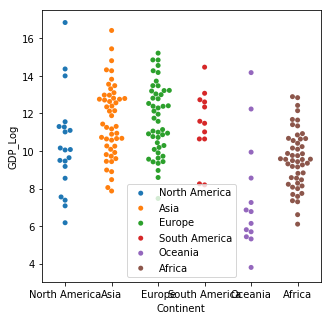

In [136]:
fig = plt.figure(figsize=(5,5))
sns.swarmplot(x='Continent', y='GDP_Log', data=world_gdp_new)
plt.gca().legend(world_gdp_new['Continent'].unique())

Boxplot:

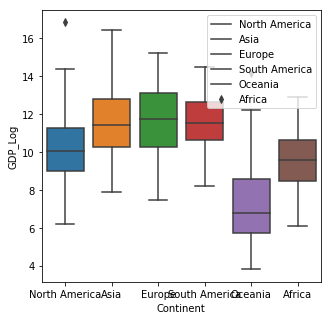

In [137]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Continent', y='GDP_Log', data=world_gdp_new)
plt.gca().legend(world_gdp_new['Continent'].unique())

ECDF

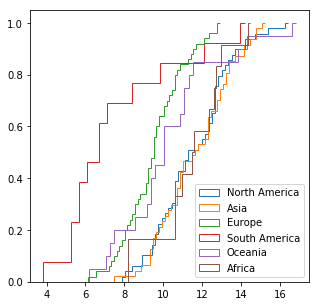

In [138]:
fig = plt.figure(figsize=(5,5))
for continent in new_df['Continent'].unique():
    n,bins,patches = plt.hist(world_gdp_new[world_gdp_new['Continent'] == continent]['GDP_Log'], cumulative=True, bins=50, density=True, histtype='step');
    patches[0].set_xy(patches[0].get_xy()[:-1])
plt.gca().legend(world_gdp_new['Continent'].unique(), loc='lower right')

In [124]:
#Which continent has the highest mean GDP?
world_gdp_new.groupby(['Continent'])['GDP_Log'].mean().head()
#Answer: Europe has the highest mean GDP

Continent
Africa            9.573513
Asia             11.623568
Europe           11.696649
North America    10.315005
Oceania           7.542000
Name: GDP_Log, dtype: float64

In [128]:
#Which continent has the highest median GDP?
world_gdp_new.groupby(['Continent'])['GDP_Log'].median().head()
#Answer: Europe has the highest median.

Continent
Africa            9.553248
Asia             11.435007
Europe           11.747128
North America    10.067216
Oceania           6.777647
Name: GDP_Log, dtype: float64

In [139]:
(world_gdp_new.groupby(['Continent'])['GDP_Log'].median() -world_gdp_new.groupby(['Continent'])['GDP_Log'].mean()).head

<bound method NDFrame.head of Continent
Africa          -0.020266
Asia            -0.188561
Europe           0.050479
North America   -0.247789
Oceania         -0.764353
South America    0.110490
Name: GDP_Log, dtype: float64>

What do you think accounts for that difference?
What accounts for the highest differnce between the median GDP and mean GDP in Oceania, is the skewedness and the fact that it has a hige outlier.

In [142]:
#Which continent has the highest variance?
world_gdp_new.groupby(['Continent'])['GDP_Log'].var().head()
#Answer: Oceania has the highest variance.

Continent
Africa           2.417245
Asia             3.736542
Europe           3.456089
North America    6.691030
Oceania          8.792366
Name: GDP_Log, dtype: float64

In [143]:
#Which continent has the highest range?
(world_gdp_new.groupby(['Continent'])['GDP_Log'].max() - world_gdp_new.groupby(['Continent'])['GDP_Log'].min()).head()
#Answer: North America has the highest range

Continent
Africa            6.783632
Asia              8.542575
Europe            7.730894
North America    10.652420
Oceania          10.364960
Name: GDP_Log, dtype: float64

Do any of the continents have outliers, and if so, which countries are outliers?
Yes they do, which are the United States(North America) and Tuvalu(Oceania)



In [164]:
world_gdp_new = world_gdp_new[['Country', 'GDP_Log', 'Continent']]
world_gdp_new.head(230)

,Country,GDP_Log,Continent
0,United States,16.836569,North America
1,China,16.415030,Asia
2,Japan,15.438975,Asia
3,Germany,15.209064,Europe
4,United Kingdom,14.848303,Europe
5,France,14.843234,Europe
6,India,14.805049,Asia
7,Italy,14.551196,Europe
8,Brazil,14.462292,South America
9,Canada,14.365772,North America


## Part Seven - Extra Data Wrangling

Some of these functions were beyond our crash course, but will be useful for this week's homework and beyond.

The 'describe' command can quickly pull out some relevant information that we looked at earlier.

In [165]:
df.describe()

,Rank,Total(Year),Male(Year),Female (Year),Male_Female_Difference
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,115.500000,30.738696,29.993913,31.451304,1.457391
std,66.539462,8.888967,8.508904,9.337026,1.746615
min,1.000000,15.400000,15.100000,15.500000,-7.100000
25%,58.250000,23.000000,22.725000,23.300000,0.500000
50%,115.500000,30.300000,29.650000,30.650000,1.300000
75%,172.750000,38.675000,37.100000,39.875000,2.300000
max,230.000000,53.100000,51.700000,54.500000,7.400000


We can filter our dataframe by looking at, for example, just countries where the male median age is higher than the female median age.

In [166]:
df[df['Male(Year)'] > df['Female (Year)']]

,Country/Territory,Rank,Total(Year),Male(Year),Female (Year),Male_Female_Difference
4,Andorra,10,44.3,44.4,44.1,-0.3
15,Bahrain,99,32.3,33.8,29.5,-4.3
23,Bhutan,144,27.6,28.2,27.1,-1.1
49,Cote d'Ivoire,187,20.9,21.0,20.9,-0.1
81,Greenland,86,33.9,35.0,32.7,-2.3
105,Jordan,178,22.5,22.9,22.0,-0.9
112,Kuwait,124,29.3,30.4,27.4,-3.0
119,Libya,130,28.9,29.1,28.7,-0.4
123,Macau,56,39.3,39.5,39.1,-0.4
144,Nauru,150,26.4,27.0,25.7,-1.3


The homework mentions the quantile function - this is the same as the Numpy Percentile function. We'll see that pandas and numpy share a lot of similar functions.

In [167]:
df['Male(Year)'].quantile(0.25)

22.724999999999998

In [168]:
np.percentile(df['Male(Year)'], 25)

22.724999999999998

We can also run functions on entire series such as multiplication or division. We can even multiply, add, subtract or divide numerical columns by each other and form new columns with them.

In [79]:
(df['Female (Year)'] / 2).head()

0     9.45
1    17.15
2    14.20
3    13.00
4    22.05
Name: Female (Year), dtype: float64

In [80]:
df['Male_Female_Difference'] = df['Female (Year)'] - df['Male(Year)']

We can use numpy's 'power' function to square a series

In [81]:
(np.power(df['Female (Year)'], 2)).head()

0     357.21
1    1176.49
2     806.56
3     676.00
4    1944.81
Name: Female (Year), dtype: float64